In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

# **Pré-análise**

In [2]:
X = pd.read_csv("X.csv")

In [3]:
y = pd.read_csv("y.csv")

In [4]:
frames = [X, y]

In [5]:
df = pd.concat(frames, axis=1)
df.rename(columns={"0": "result"}, inplace=True)

In [6]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    radius_mean              569 non-null    float64
 1    texture_mean             569 non-null    float64
 2    perimeter_mean           569 non-null    float64
 3    area_mean                569 non-null    float64
 4    smoothness_mean          569 non-null    float64
 5    compactness_mean         569 non-null    float64
 6    concavity_mean           569 non-null    float64
 7   concave_points_mean       569 non-null    float64
 8    symmetry_mean            569 non-null    float64
 9    fractal_dimension_mean   569 non-null    float64
 10   radius_se                569 non-null    float64
 11   texture_se               569 non-null    float64
 12   perimeter_se             569 non-null    float64
 13   area_se                  569 non-null    float64
 14   smoothnes

In [8]:
df.isna().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
result                      0
dtype: int64

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,...,25.677223,107.261213,880.583128,10.633281,25.259112,26.723742,8.745685,30.367174,1.964313,0.627417
std,2430.243368,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,...,6.146258,33.602542,569.356993,37.236433,96.473015,114.204035,39.465975,90.748044,14.464355,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,12.210000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,...,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460,0.000000
50%,13.850000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,...,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060,1.000000
75%,17.680000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,...,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110,1.000000
max,9904.000000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,...,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000,1.000000


In [10]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
radius_mean,1.000000,-0.099840,-0.386753,-0.319166,0.029797,-0.050406,-0.002002,-0.041176,0.059780,-0.031360,...,-0.115969,-0.347007,-0.278298,0.024718,-0.017172,0.005269,-0.012441,-0.036770,-0.036936,0.218766
texture_mean,-0.099840,1.000000,0.329533,0.321086,0.033670,0.140073,0.054148,0.082132,-0.032590,-0.094817,...,0.912045,0.358040,0.343546,-0.005302,0.034215,0.031426,0.059725,-0.064752,0.019585,-0.415185
perimeter_mean,-0.386753,0.329533,1.000000,0.986507,0.105892,0.098709,0.155419,0.215696,-0.097831,-0.024489,...,0.303038,0.970387,0.941550,0.000419,0.023235,0.058499,0.185364,0.086627,0.027304,-0.742636
area_mean,-0.319166,0.321086,0.986507,1.000000,0.107286,0.076765,0.151664,0.215024,-0.096938,-0.028365,...,0.287489,0.959120,0.959213,-0.002280,0.010010,0.055673,0.183860,0.083427,0.008054,-0.708984
smoothness_mean,0.029797,0.033670,0.105892,0.107286,1.000000,-0.034976,0.014554,0.043158,0.001686,-0.022084,...,0.037551,0.125642,0.128621,0.016403,-0.051672,0.026080,0.030205,0.022975,-0.025747,-0.128880
compactness_mean,-0.050406,0.140073,0.098709,0.076765,-0.034976,1.000000,0.103352,0.178646,0.006421,-0.019556,...,0.129648,0.125386,0.088754,0.075275,-0.036373,0.063028,0.083746,0.039552,0.192826,-0.099244
concavity_mean,-0.002002,0.054148,0.155419,0.151664,0.014554,0.103352,1.000000,0.066535,-0.019557,-0.023116,...,0.051821,0.151919,0.144454,-0.008968,0.030513,0.256058,0.090931,-0.042144,-0.026531,-0.132225
concave_points_mean,-0.041176,0.082132,0.215696,0.215024,0.043158,0.178646,0.066535,1.000000,-0.044912,-0.016021,...,0.052106,0.203744,0.197594,0.072517,-0.036878,-0.032678,0.080438,-0.047359,0.123428,-0.141168
symmetry_mean,0.059780,-0.032590,-0.097831,-0.096938,0.001686,0.006421,-0.019557,-0.044912,1.000000,-0.034609,...,-0.050247,-0.100861,-0.100657,-0.046680,0.024209,0.083441,0.099551,-0.004926,-0.040480,0.077920
fractal_dimension_mean,-0.031360,-0.094817,-0.024489,-0.028365,-0.022084,-0.019556,-0.023116,-0.016021,-0.034609,1.000000,...,-0.100771,-0.040124,-0.043344,-0.031295,-0.028818,-0.001437,-0.024388,0.055950,-0.014295,0.045698


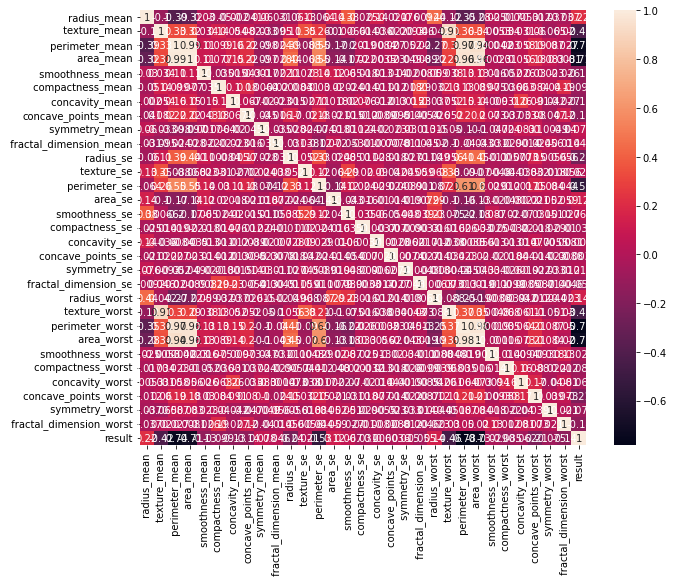

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

#**XGBOOST**

### **Black-Box**

In [ ]:
#Separando o que é features e target:
X = df.drop(columns=["result"])
y = df["result"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                      ("pca", PCA(n_components=2)),
                     ("xgbr", XGBClassifier(eval_metric='logloss', random_state=42))])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [1000],
                   "xgbr__max_depth": [2],
                   "xgbr__learning_rate": [0.001],
                   "xgbr__colsample_bytree": [0.5],
                   "xgbr__subsample": [0.5]}

#Motando a grade geral de parâmetros.
breast_cancer_03_xgbc = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

breast_cancer_03_xgbc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         [' '
                                                                          'radius_mean',
                                                                          ' '
                                                                          'texture_mean',
                        

In [ ]:
breast_cancer_03_xgbc.best_params_

{'xgbr__colsample_bytree': 0.5,
 'xgbr__learning_rate': 0.001,
 'xgbr__max_depth': 2,
 'xgbr__n_estimators': 1000,
 'xgbr__subsample': 0.5}

In [ ]:
grid_xgbr_results = pd.DataFrame(breast_cancer_03_xgbc.cv_results_)
grid_xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__colsample_bytree,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,param_xgbr__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.200446,0.009338,0.007410,0.000246,0.5,0.001,2,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.786667,0.413333,0.680000,0.570068,0.516327,0.593279,0.129430,1
0,0.074805,0.007229,0.005841,0.000084,0.5,0.01,2,250,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.840000,0.360000,0.733333,0.516327,0.516327,0.593197,0.171318,2
1,0.130342,0.005770,0.006912,0.000463,0.5,0.01,2,600,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.733333,0.413333,0.786667,0.516327,0.516327,0.593197,0.142294,2
2,0.159436,0.008089,0.007901,0.001986,0.5,0.01,2,750,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.733333,0.413333,0.786667,0.516327,0.516327,0.593197,0.142294,2
28,0.464693,0.009306,0.011649,0.000319,0.5,0.001,2,2500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.786667,0.413333,0.733333,0.516327,0.516327,0.593197,0.142294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.174315,0.005223,0.008812,0.002237,0.5,0.01,3,750,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.733333,0.413333,0.626667,0.462585,0.462585,0.539701,0.120763,68
34,0.524958,0.007714,0.014993,0.000524,0.5,0.001,3,2500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.786667,0.413333,0.573333,0.462585,0.462585,0.539701,0.134153,68
35,2.056968,0.026137,0.046118,0.001311,0.5,0.001,3,10000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.786667,0.413333,0.573333,0.462585,0.462585,0.539701,0.134153,68
41,2.397830,0.045860,0.056720,0.003923,0.5,0.001,5,10000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.786667,0.413333,0.520000,0.462585,0.462585,0.529034,0.133172,71



Métricas de avaliação de treino:
[[131  19]
 [ 12 236]]


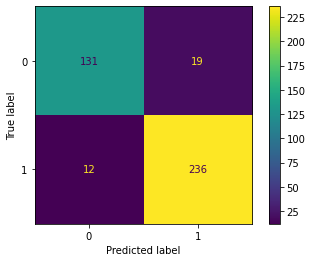

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.93      0.95      0.94       248

    accuracy                           0.92       398
   macro avg       0.92      0.91      0.92       398
weighted avg       0.92      0.92      0.92       398


Métricas de avaliação de teste:
[[ 55   7]
 [  6 103]]


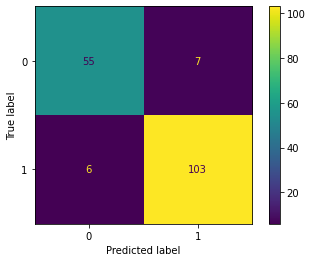

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.94      0.94      0.94       109

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = breast_cancer_03_xgbc.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

#plot_confusion_matrix(grid_xgbr, X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = breast_cancer_03_xgbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

#plot_confusion_matrix(grid_xgbr, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

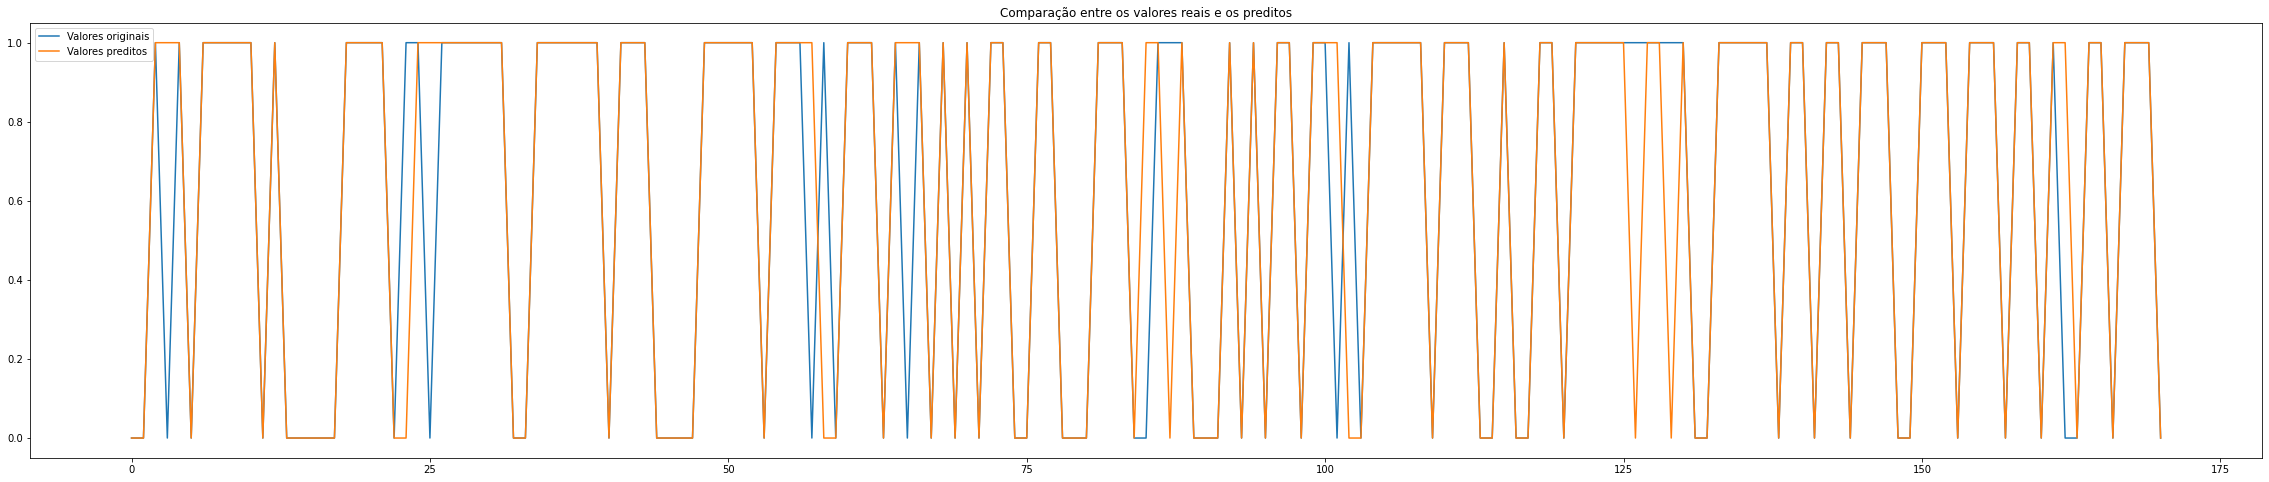

In [ ]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Comparação entre os valores reais e os preditos")
plt.legend()
plt.show();

**Probabilidade de sair determinado diagnóstico:**

In [ ]:
resultado_xgbr = df["result"].unique()
print(f"{resultado_xgbr}")

[0 1]


**Probabilidade de sair cada diagnóstico:**

In [ ]:
probas = breast_cancer_03_xgbc.predict_proba(X_test)
probas

array([[0.67836344, 0.3216366 ],
       [0.60611224, 0.39388776],
       [0.29287815, 0.70712185],
       [0.33009177, 0.6699082 ],
       [0.30465835, 0.69534165],
       [0.6796547 , 0.32034525],
       [0.2225756 , 0.7774244 ],
       [0.31021965, 0.68978035],
       [0.21935493, 0.7806451 ],
       [0.3118037 , 0.6881963 ],
       [0.31272554, 0.68727446],
       [0.67836344, 0.3216366 ],
       [0.3019787 , 0.6980213 ],
       [0.5674341 , 0.43256596],
       [0.6772721 , 0.3227279 ],
       [0.51230586, 0.48769417],
       [0.6644771 , 0.33552286],
       [0.68995535, 0.31004465],
       [0.3096056 , 0.6903944 ],
       [0.28381628, 0.7161837 ],
       [0.31330055, 0.68669945],
       [0.30773634, 0.69226366],
       [0.6649736 , 0.33502638],
       [0.67174274, 0.32825726],
       [0.31413466, 0.68586534],
       [0.4796008 , 0.5203992 ],
       [0.31823003, 0.68176997],
       [0.3089826 , 0.6910174 ],
       [0.3152123 , 0.6847877 ],
       [0.31005514, 0.68994486],
       [0.

In [ ]:
tabela_breast_cancer_xgbc = pd.DataFrame()

In [ ]:
tabela_breast_cancer_xgbc["Amostra existente"] = y_test

In [ ]:
tabela_breast_cancer_xgbc["Predição"] = y_pred_test

In [ ]:
tabela_breast_cancer_xgbc

,Amostra existente,Predição
197,0,0
351,0,0
338,1,1
47,0,1
474,1,1
...,...,...
433,0,0
217,1,1
401,1,1
334,1,1


Salvando a tabela

In [ ]:
tabela_breast_cancer_xgbc.to_csv("03_breast_cancer_xgbc.csv")

Salvando o estimador...

In [ ]:
import pickle

In [ ]:
with open("breast_cancer_03_xgbc.pkl", "wb") as f:
    pickle.dump(breast_cancer_03_xgbc, f)

In [ ]:
with open("breast_cancer_03_xgbc.pkl", "rb") as f:
    
    breast_cancer_03_xgbc = pickle.load(f)

### **Intervalo de confiança do XGBoost - Vamos simular intervalos para amostras com 29 e 100 dados:**

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

**Com 29 e 100 amostras**

In [19]:
xgboost_cv_29 = []
xgboost_cv_100 = []
for i in range(10):
  kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = i)
  
  xgboost = XGBClassifier()
  scores = cross_val_score(xgboost, X, y, cv = kfold)
  xgboost_cv_100.append(scores)
  xgboost_cv_29.append(scores.mean())

In [20]:
xgboost_cv_29 = np.array(xgboost_cv_29)
xgboost_cv_100 = np.array(np.asarray(xgboost_cv_100).reshape(-1))

**Para 29 amostras usamos o t-student:**

In [21]:
intervalos_xgboost_t = t.interval(0.95, len(xgboost_cv_29) - 1, 
                                    xgboost_cv_29.mean(), 
                                    stats.sem(xgboost_cv_29, ddof = 0))
intervalos_xgboost_t

(0.9610129891191206, 0.9648078128858921)

**Variação do intervalo:**

In [22]:
var = abs(xgboost_cv_29.mean() - intervalos_xgboost_t[1])
var

0.001897411883385769

In [25]:
print(f"Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 29 amostras está no intervalo entre {intervalos_xgboost_t[0]*100:.2f}% e {intervalos_xgboost_t[1]*100:.2f}% com variação de {var:.4f} para mais ou para menos")

Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 29 amostras está no intervalo entre 96.10% e 96.48% com variação de 0.0019 para mais ou para menos


**Média do score:**

In [26]:
pd.DataFrame(xgboost_cv_29).mean()[0]

0.9629104010025064



---



**Para 100 amostras**

In [27]:
intervalos_xgboost_n = norm.interval(0.95, xgboost_cv_100.mean(), 
                                       stats.sem(xgboost_cv_100))
intervalos_xgboost_n

(0.9582945718982213, 0.967526230106791)

**Variação do intervalo:**

In [28]:
var_100 = abs(xgboost_cv_100.mean() - intervalos_xgboost_n[1])
var_100

0.004615829104284819

In [31]:
print(f"Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 100 amostras está no intervalo entre {intervalos_xgboost_n[0]*100:.2f}% e {intervalos_xgboost_n[1]*100:.2f}% com variação de {var_100:.4f} para mais ou para menos")

Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 100 amostras está no intervalo entre 95.83% e 96.75% com variação de 0.0046 para mais ou para menos


**Média do score:**

In [30]:
resultado_100 = xgboost_cv_100
resultado_100 = (resultado_100[0] + resultado_100[1] + resultado_100[2])/3
resultado_100

0.9649122807017544

# **Otimização Bayesiana**



---



---



---



In [32]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_breast_cancer(drop_not_features=["result"], col_target="result",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [33]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_breast_cancer(drop_not_features=["result"], 
                                                                            col_target="result",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [34]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [35]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.01]),
             "n_estimators" : hp.choice("n_estimators", range(1, 2000)),
             "max_depth" : hp.choice("max_depth", [1, 2]),
             "reg_alpha": hp.choice("reg_alpha", [0.1, 0.5, 0.9])}

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBClassifier(**hps_space))])

    # =============================================

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train, y_train, 
                             cv=splitter,
                             scoring="f1_weighted",
                             n_jobs=-1)

    mean_f1 = results["test_score"].mean()

    # como o valor vai ser minimizado, mas queremos MAXIMIZAR o f1, colocamos esse sinal negativo
    return mean_f1

In [38]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [00:23<00:00,  2.35s/it, best loss: 0.9185129163576391]


In [39]:
# pré-resposta da otimização
best_hps

{'learning_rate': 0, 'max_depth': 1, 'n_estimators': 208, 'reg_alpha': 1}

In [40]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 209, 'reg_alpha': 0.5}

In [45]:
XGBClassifier(**best_hps)

XGBClassifier(learning_rate=0.001, max_depth=2, n_estimators=209, reg_alpha=0.5)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))


Métricas de avaliação de treino:
[[162   8]
 [ 11 274]]


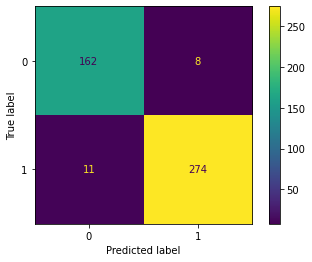

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       170
           1       0.97      0.96      0.97       285

    accuracy                           0.96       455
   macro avg       0.95      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


Métricas de avaliação de teste:
[[38  4]
 [10 62]]


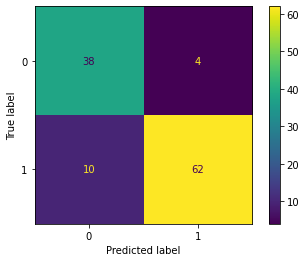

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        42
           1       0.94      0.86      0.90        72

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBClassifier(**best_hps))])

pipe.fit(X_train, y_train)

metricas_classificacao(pipe, X_train, X_test, y_train, y_test)



---



---



---



#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

In [ ]:
X = pd.read_csv("X.csv")

In [ ]:
y = pd.read_csv("y.csv")

In [ ]:
frames = [X, y]

In [ ]:
df = pd.concat(frames, axis=1)
df.rename(columns={"0": "result"}, inplace=True)

In [ ]:
X = df.drop(columns=["result"])
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
xgbc_shap = XGBClassifier().fit(X_train, y_train)

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.Explainer(xgbc_shap, X_train)

In [ ]:
shap_vals = explainer.shap_values(X_train)


In [ ]:
especie = df["result"].unique()
print(f"{especie}")

[0 1]


**Features que mais impactaram na escolha das espécies durante a geração do predict:**

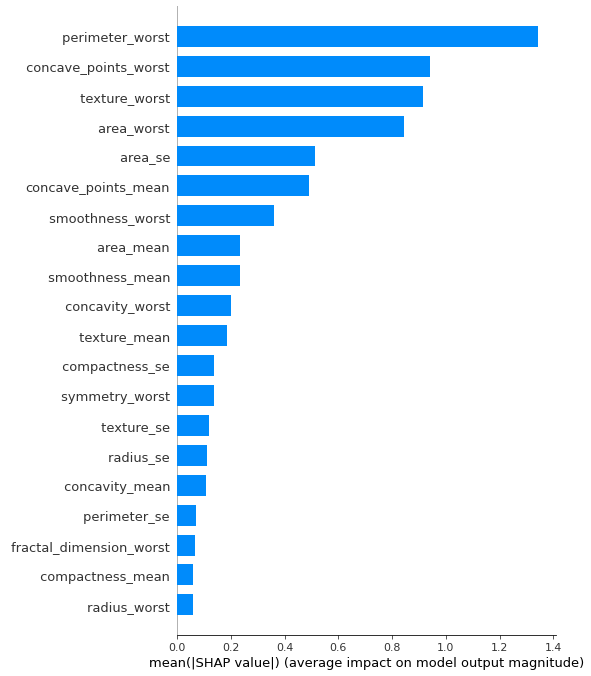

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")